#Import Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import the Dataset


In [89]:
df = pd.read_csv("/content/10.identifying_high_risk_borrowers_dummy_data (1).csv")

In [90]:
df.index
df.columns

Index(['borrower_age', 'income_bracket', 'marital_status', 'job_type',
       'education_level', 'ethnicity', 'gender', 'country', 'loan_amount',
       'credit_score', 'repayment_history', 'debt_to_income_ratio',
       'borrower_risk'],
      dtype='object')

In [91]:
print(df.size)
print(df.shape)

13000
(1000, 13)


#Attributes of Individual Variables

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   borrower_age          1000 non-null   int64 
 1   income_bracket        1000 non-null   object
 2   marital_status        1000 non-null   object
 3   job_type              1000 non-null   object
 4   education_level       1000 non-null   object
 5   ethnicity             1000 non-null   object
 6   gender                1000 non-null   object
 7   country               1000 non-null   object
 8   loan_amount           1000 non-null   object
 9   credit_score          1000 non-null   object
 10  repayment_history     1000 non-null   object
 11  debt_to_income_ratio  1000 non-null   object
 12  borrower_risk         1000 non-null   object
dtypes: int64(1), object(12)
memory usage: 101.7+ KB


#Special Characters





In [93]:
for columns in df.columns.values.tolist():
  print(columns)
  print(df[columns].unique())

borrower_age
[56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
income_bracket
['???' 'High' 'Low' 'Medium']
marital_status
['Single' 'Widowed' 'Married' 'Divorced' ' ']
job_type
['Self-employed' 'Unemployed' 'Full-time' '???' 'Part-time' ' ']
education_level
['Bachelor' 'PhD' 'Master' 'High School' '???' 'Associate' ' ' '  ']
ethnicity
['Black' 'Other' 'Asian' 'White' 'Hispanic' ' ']
gender
['Male' 'Female' '???' ' ']
country
['USA' 'Canada' 'Australia' 'UK' 'India']
loan_amount
['477322.3674' '459342.2798' '24449.258' '170067.6978' '203169.1283' '???'
 '314807.5756' '320549.9926' '425401.6099' '370693.7649' '271744.0902'
 '327139.7983' '137720.402' '296935.0388' '245124.4001' '67538.88919'
 '122029.594' '146555.0319' '462230.474' '115962.9331' '145332.7075'
 '185307.7109' '332207.6266' '60000.95784' '477018.661' '432920.0388'
 '289030.8204' '337344.8958' '9313.575151' '170133.

#Import the dataset with special characters

In [95]:
df = pd.read_csv("/content/10.identifying_high_risk_borrowers_dummy_data (1).csv",na_values=[' ', '  ', '???'])

In [96]:
df.isnull().sum()

,0
borrower_age,0
income_bracket,1
marital_status,2
job_type,11
education_level,5
ethnicity,2
gender,8
country,0
loan_amount,2
credit_score,3


In [97]:
df.dropna(axis = 0,inplace=True)

In [98]:
df.isnull().sum()

,0
borrower_age,0
income_bracket,0
marital_status,0
job_type,0
education_level,0
ethnicity,0
gender,0
country,0
loan_amount,0
credit_score,0


In [99]:
df.shape

(962, 13)

In [100]:
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce')

#EDA Process

In [101]:
#Summarry Stastistics
df.describe()  #Provides only for numeric data

,borrower_age,loan_amount,credit_score,repayment_history,debt_to_income_ratio
count,962.000000,962.000000,962.000000,962.000000,962.000000
mean,43.909563,242974.832017,577.528850,51.273789,50.194464
std,14.967364,147436.861488,155.325818,29.129106,28.994355
min,18.000000,1313.130798,300.880653,0.181203,0.135552
25%,31.000000,111331.460450,450.790930,26.370729,25.736894
50%,44.000000,244071.511500,579.544181,52.313614,50.523032
75%,56.000000,365648.337850,708.939029,77.135029,75.929374
max,69.000000,499924.773000,849.863360,99.974127,99.970764


In [102]:
df.describe(include='object')  #Provides only for categorical data

,income_bracket,marital_status,job_type,education_level,ethnicity,gender,country,borrower_risk
count,962,962,962,962,962,962,962,962
unique,3,4,4,5,5,2,5,3
top,Low,Married,Unemployed,Bachelor,Other,Male,Canada,Medium
freq,331,256,264,204,204,482,220,332


In [103]:
df.groupby('borrower_risk')[['loan_amount', 'credit_score']].mean()

,loan_amount,credit_score
borrower_risk,,
High,241276.556675,586.266972
Low,243981.515130,573.431185
Medium,243728.780974,572.662062


In [104]:
df.groupby('borrower_risk')[['loan_amount', 'country']].median()

borrower_risk  country  
High           Australia    242828.659054
               Canada       259597.941107
               India        236973.550226
               UK           209013.310086
               USA          248867.807657
Low            Australia    232314.873374
               Canada       218873.929216
               India        248666.195475
               UK           293889.302095
               USA          225299.303604
Medium         Australia    235895.707184
               Canada       259031.288277
               India        253968.720894
               UK           229806.227420
               USA          237138.975419
Name: loan_amount, dtype: float64

In [ ]:
df.groupby(['job_type'])['repayment_history'].median()

,repayment_history
job_type,
Full-time,40.267121
Part-time,56.147794
Self-employed,55.333320
Unemployed,54.802036


In [ ]:
df.groupby(['job_type'])['repayment_history'].median()

,repayment_history
job_type,
Full-time,40.267121
Part-time,56.147794
Self-employed,55.333320
Unemployed,54.802036


In [106]:
df.groupby(['gender'])['credit_score'].mean()

,credit_score
gender,
Female,577.240890
Male,577.815614


#Frequency Table

In [107]:
pd.crosstab(index=df['borrower_risk'],columns='count',dropna=True)

col_0,count
borrower_risk,
High,327
Low,303
Medium,332


#Joint Probablity

In [108]:
pd.crosstab(df['borrower_risk'],df['marital_status'],normalize=True,margins=True)

marital_status,Divorced,Married,Single,Widowed,All
borrower_risk,,,,,
High,0.067568,0.095634,0.089397,0.087318,0.339917
Low,0.090437,0.084200,0.065489,0.074844,0.314969
Medium,0.072765,0.086279,0.103950,0.082121,0.345114
All,0.230769,0.266112,0.258836,0.244283,1.000000


#Conditional Probablity

In [109]:
pd.crosstab(df['marital_status'],df['borrower_risk'],normalize='index',margins=True)

borrower_risk,High,Low,Medium
marital_status,,,
Divorced,0.292793,0.391892,0.315315
Married,0.359375,0.316406,0.324219
Single,0.345382,0.253012,0.401606
Widowed,0.357447,0.306383,0.336170
All,0.339917,0.314969,0.345114


In [110]:
pd.crosstab(df['marital_status'],df['borrower_risk'],normalize='columns',margins=True)

borrower_risk,High,Low,Medium,All
marital_status,,,,
Divorced,0.198777,0.287129,0.210843,0.230769
Married,0.281346,0.267327,0.250000,0.266112
Single,0.262997,0.207921,0.301205,0.258836
Widowed,0.256881,0.237624,0.237952,0.244283


#Correlation

In [111]:
df.select_dtypes(include=['number']).corr()

,borrower_age,loan_amount,credit_score,repayment_history,debt_to_income_ratio
borrower_age,1.000000,-0.009212,-0.024551,0.016716,-0.008173
loan_amount,-0.009212,1.000000,-0.040534,-0.022296,0.000390
credit_score,-0.024551,-0.040534,1.000000,0.000475,0.008357
repayment_history,0.016716,-0.022296,0.000475,1.000000,-0.038886
debt_to_income_ratio,-0.008173,0.000390,0.008357,-0.038886,1.000000


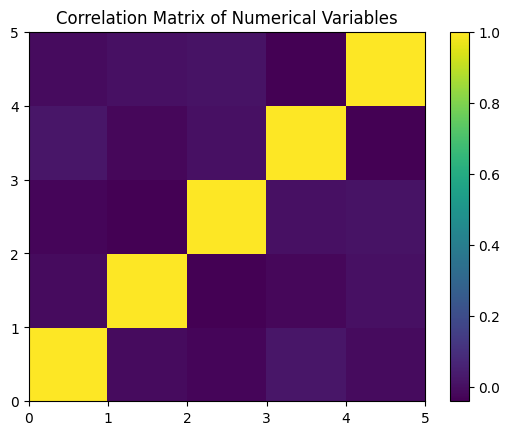

In [112]:
plt.pcolor(number.corr())
plt.colorbar()
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [113]:
df['credit_score'].corr(df['repayment_history'])

0.0004754091505657107

In [114]:
df['credit_score'].corr(df['loan_amount'])

-0.040534044796063644

In [115]:
df['credit_score'].corr(df['debt_to_income_ratio'])

0.008357377330139243

#Data Visualization

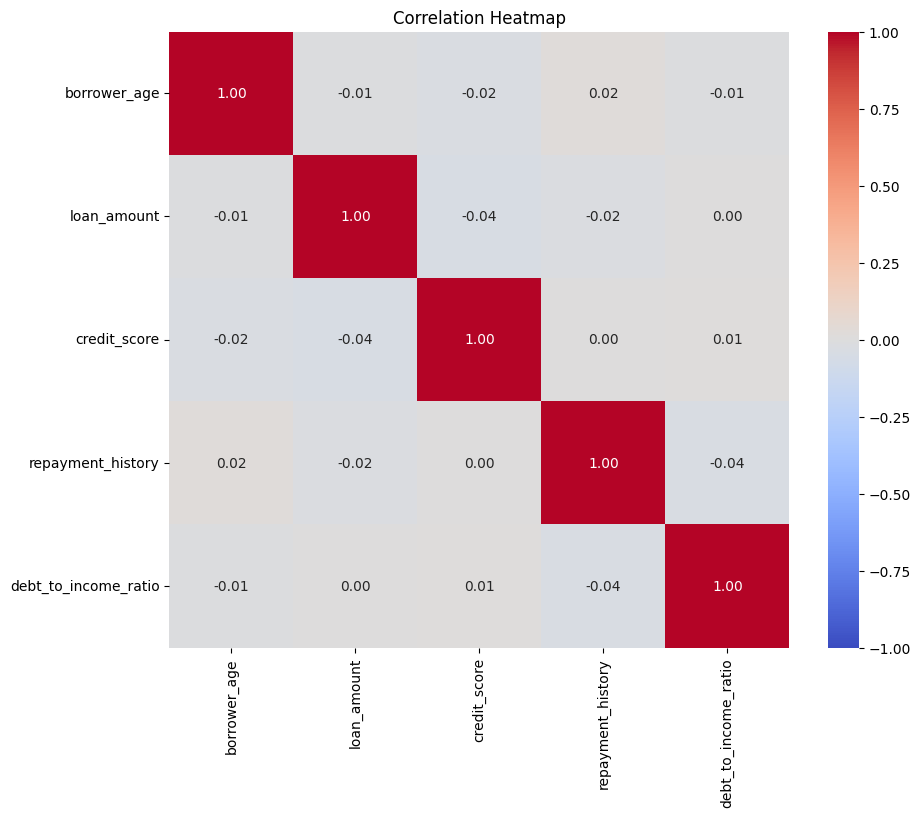

In [116]:
#CORRELATION MATRIX
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

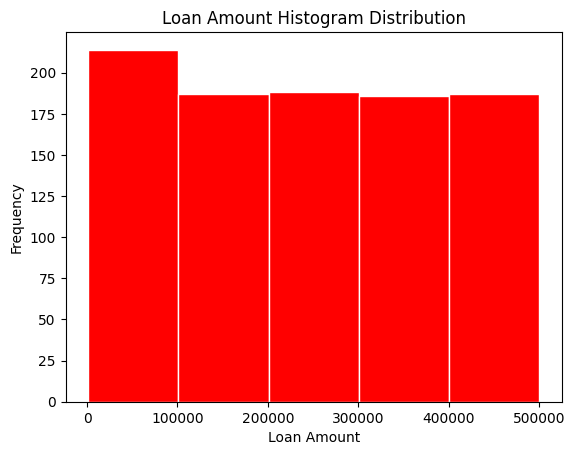

In [117]:
#HISTOGRAM
plt.hist(df['loan_amount'], bins=5, edgecolor='white', color='red')
plt.title('Loan Amount Histogram Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Credit Score')

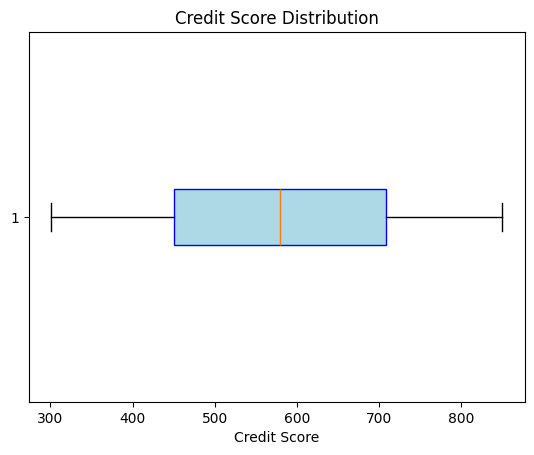

In [118]:
#BOXPLOT
plt.boxplot(df['credit_score'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')

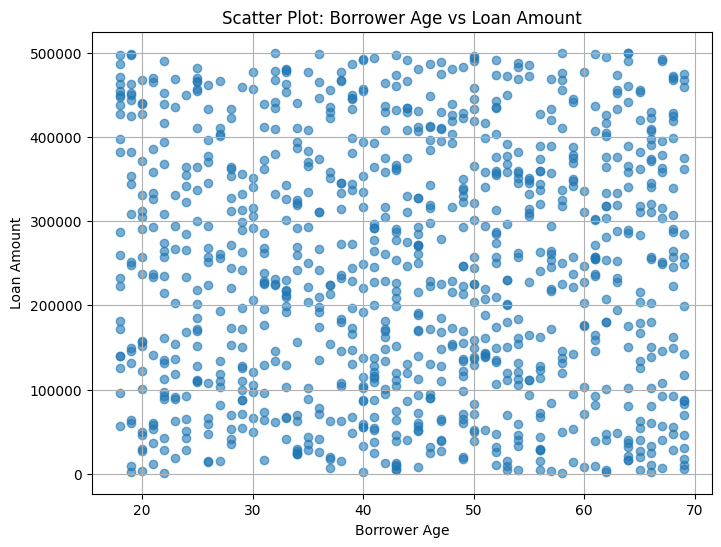

In [119]:
#SCATTER PLOT
plt.figure(figsize=(8, 6))
plt.scatter(df['borrower_age'], df['loan_amount'].astype(float), alpha=0.6)
plt.title('Scatter Plot: Borrower Age vs Loan Amount')
plt.xlabel('Borrower Age')
plt.ylabel('Loan Amount')
plt.grid()
plt.show()

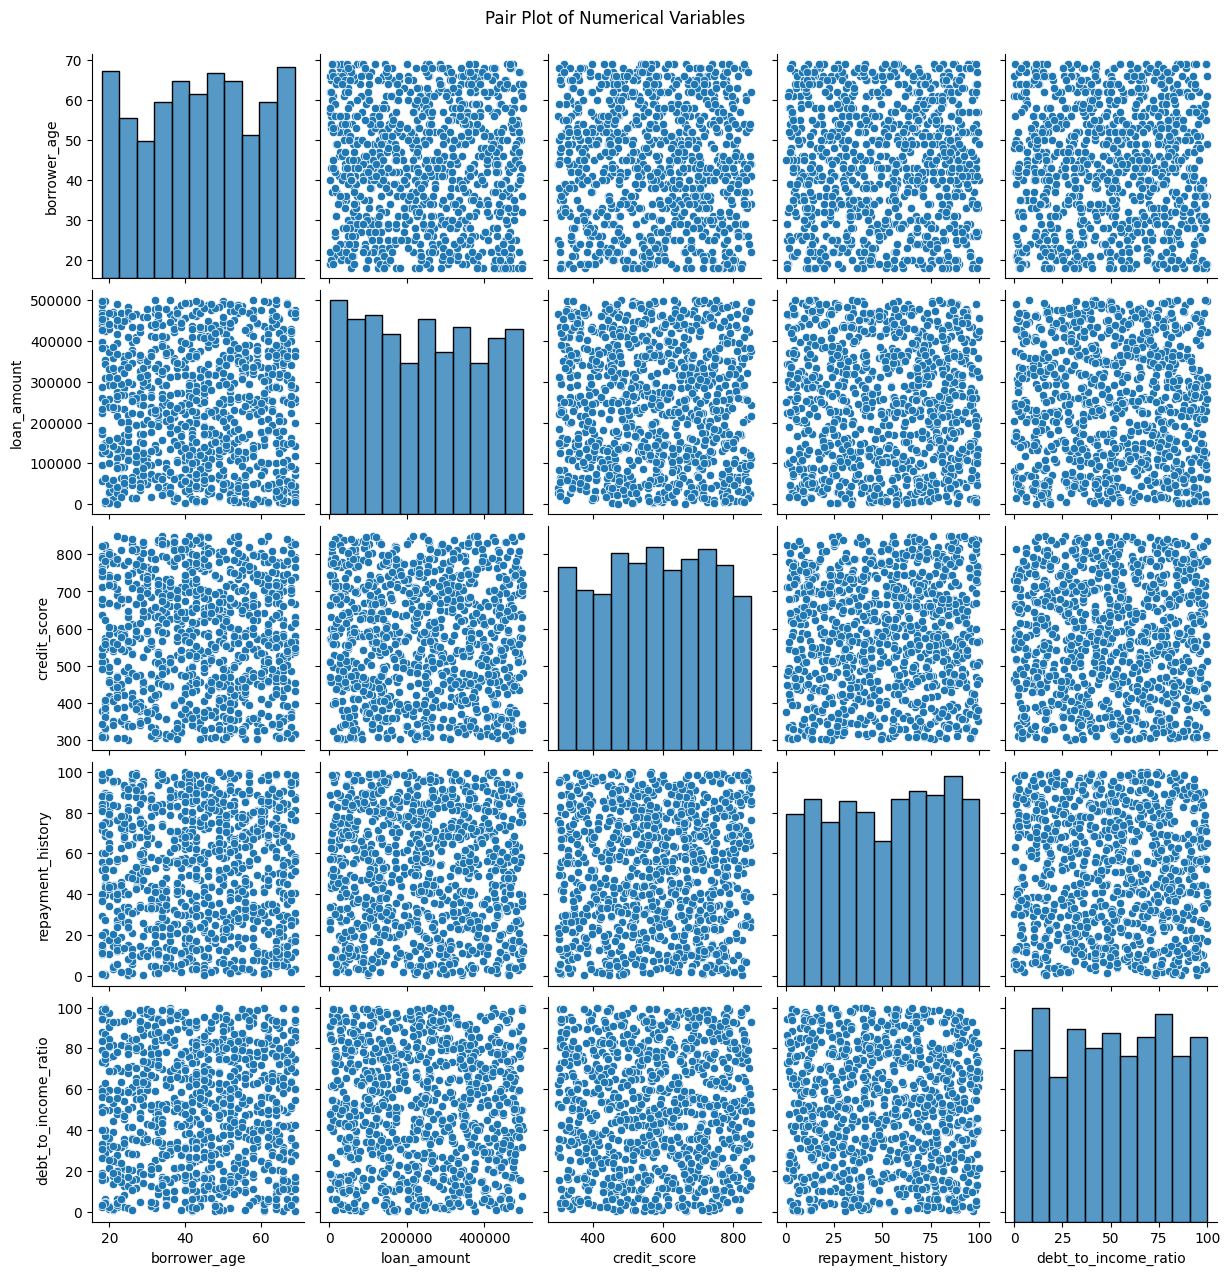

In [120]:
#PAIR PLOT
sns.pairplot(df_numeric)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

<ipython-input-121-20f4ff8fe021>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette='pastel')


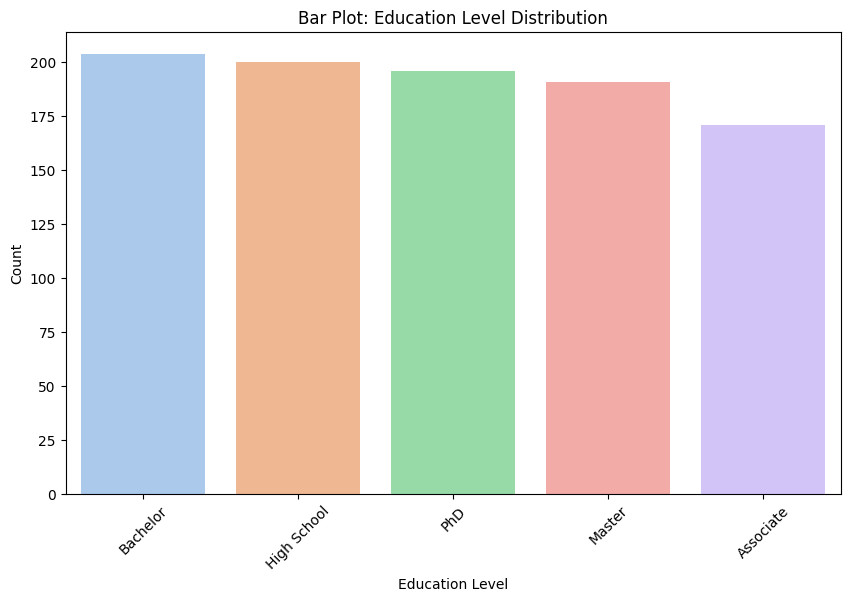

In [121]:
#BAR PLOT
plt.figure(figsize=(10, 6))
education_counts = df['education_level'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values, palette='pastel')
plt.title('Bar Plot: Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

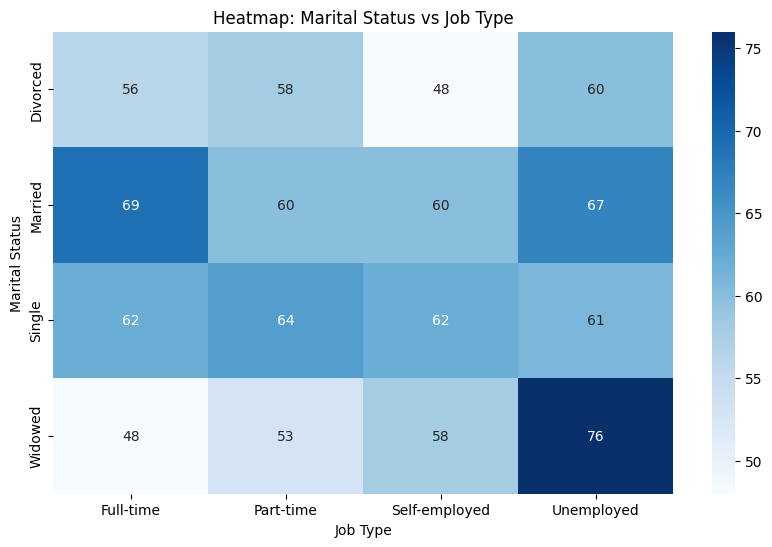

In [122]:
#HEATMAP
cross_tab = pd.crosstab(df['marital_status'], df['job_type'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Blues')
plt.title('Heatmap: Marital Status vs Job Type')
plt.xlabel('Job Type')
plt.ylabel('Marital Status')
plt.show()

#MODEL BUILDING

In [123]:
np.unique(df['borrower_risk'])

array(['High', 'Low', 'Medium'], dtype=object)

In [124]:
#REDUCING THE LEVELS IN DEPENDENT VARIABLE
df['borrower_risk'] = df['borrower_risk'].map({'Low': 'Low & Medium', 'Medium': 'Low & Medium', 'High': 'High'})

unique_values = np.unique(df['borrower_risk'])
print("Updated unique values in 'borrower_risk':", unique_values)


value_counts = df['borrower_risk'].value_counts()
print("\nCounts of unique values in 'borrower_risk' after mapping:")
print(value_counts)

Updated unique values in 'borrower_risk': ['High' 'Low & Medium']

Counts of unique values in 'borrower_risk' after mapping:
borrower_risk
Low & Medium    635
High            327
Name: count, dtype: int64


In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load Your Dataset
df = pd.read_csv('your_dataset.csv')  # Replace with your dataset file

# Data Preprocessing
# Map 'borrower_risk' levels to 'Low/Medium Risk' and 'High Risk'
df['borrower_risk'] = df['borrower_risk'].map({'Low': 'Low/Medium Risk', 'Medium': 'Low/Medium Risk', 'High': 'High Risk'})

# Separate Features (X) and Target (y)
X = df.drop('borrower_risk', axis=1)  # Replace 'borrower_risk' with your target column
y = df['borrower_risk']

# Encode Categorical Variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,


In [125]:
#SMOTE AND RANDOM FOREST
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('borrower_risk', axis=1)
y = df['borrower_risk']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("\nClass Distribution After SMOTE:\n", y_train_smote.value_counts())

model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class Distribution Before SMOTE:
 borrower_risk
Low & Medium    444
High            229
Name: count, dtype: int64

Class Distribution After SMOTE:
 borrower_risk
High            444
Low & Medium    444
Name: count, dtype: int64

Confusion Matrix:
[[ 15  83]
 [ 33 158]]

Classification Report:
              precision    recall  f1-score   support

        High       0.31      0.15      0.21        98
Low & Medium       0.66      0.83      0.73       191

    accuracy                           0.60       289
   macro avg       0.48      0.49      0.47       289
weighted avg       0.54      0.60      0.55       289



In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


X = df.drop('borrower_risk', axis=1)  # Replace 'borrower_risk' with your target column
y = df['borrower_risk']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("\nClass Distribution After SMOTE:\n", y_train_smote.value_counts())


classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine (SVM)': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")


    model.fit(X_train_smote, y_train_smote)


    y_pred = model.predict(X_test)

    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


Class Distribution Before SMOTE:
 borrower_risk
Low & Medium    444
High            229
Name: count, dtype: int64

Class Distribution After SMOTE:
 borrower_risk
High            444
Low & Medium    444
Name: count, dtype: int64

Training Logistic Regression...

Confusion Matrix for Logistic Regression:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[55 43]
 [95 96]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       0.37      0.56      0.44        98
Low & Medium       0.69      0.50      0.58       191

    accuracy                           0.52       289
   macro avg       0.53      0.53      0.51       289
weighted avg       0.58      0.52      0.53       289


Training K-Nearest Neighbors (KNN)...

Confusion Matrix for K-Nearest Neighbors (KNN):
[[ 42  56]
 [ 83 108]]

Classification Report for K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

        High       0.34      0.43      0.38        98
Low & Medium       0.66      0.57      0.61       191

    accuracy                           0.52       289
   macro avg       0.50      0.50      0.49       289
weighted avg       0.55      0.52      0.53       289


Training Decision Tree...

Confusion Matrix for Decision Tree:
[[ 31  67]
 [ 66 125]]

Classification Report for 

In [2]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Load the dataset
file_path = "10.identifying_high_risk_borrowers_dummy_data (1).csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Clean the data
df.replace({' ': np.nan, '  ': np.nan, '???': np.nan}, inplace=True)
df['borrower_risk'] = df['borrower_risk'].map({'Low': 0, 'Medium': 0, 'High': 1})
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('borrower_risk', axis=1)
y = df['borrower_risk']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models with probability=True for SVC
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),  # Set probability=True to allow predict_proba
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

# Function to train, predict, and evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate ROC AUC score
        if hasattr(model, 'predict_proba'):
            roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        else:
            roc_auc = np.nan  # If the model doesn't support predict_proba, set ROC AUC as NaN

        # Append results to list
        results.append({
            'Model': model_name,
            'Accuracy': accuracy * 100,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        })
    return pd.DataFrame(results)

# Evaluate all models
results_df = evaluate_models(models, X_train, X_test, y_train, y_test)

# Display the results
print(results_df)


                 Model   Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  50.000000   0.500000  1.000000  0.666667  0.737238
1          Naive Bayes  50.000000   0.500000  1.000000  0.666667  0.500000
2                  KNN  50.000000   0.500000  1.000000  0.666667  0.500000
3                  SVM  72.932331   1.000000  0.458647  0.628866  0.743174
4        Decision Tree  65.789474   0.659091  0.654135  0.656604  0.657895
5        Random Forest  58.270677   0.549550  0.917293  0.687324  0.767059


In [5]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Load the dataset
file_path = "10.identifying_high_risk_borrowers_dummy_data (1).csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Clean the data
df.replace({' ': np.nan, '  ': np.nan, '???': np.nan}, inplace=True)
df['borrower_risk'] = df['borrower_risk'].map({'Low': 0, 'Medium': 0, 'High': 1})
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('borrower_risk', axis=1)
y = df['borrower_risk']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models with probability=True for SVC
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

# Hyperparameter tuning using RandomizedSearchCV for SVM and Random Forest
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search_svm = RandomizedSearchCV(SVC(probability=True), param_grid_svm, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the RandomizedSearchCV models
random_search_svm.fit(X_train, y_train)
random_search_rf.fit(X_train, y_train)

# Get the best models from the RandomizedSearchCV
best_svm = random_search_svm.best_estimator_
best_rf = random_search_rf.best_estimator_

# Create the Voting Classifier with best models and others (using soft voting)
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('svm', best_svm),
    ('dt', DecisionTreeClassifier()),
    ('rf', best_rf)
], voting='soft')  # Use 'soft' voting to enable predict_proba

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_model.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, voting_model.predict_proba(X_test)[:, 1])

# Display results
print(f"\nVoting Classifier Model Accuracy: {accuracy_voting * 100:.2f}%")
print(f"Precision: {precision_voting}")
print(f"Recall: {recall_voting}")
print(f"F1 Score: {f1_voting}")
print(f"ROC AUC: {roc_auc_voting}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Voting Classifier Model Accuracy: 50.00%
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
ROC AUC: 0.7531799423370455


In [8]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Load the dataset
file_path = "10.identifying_high_risk_borrowers_dummy_data (1).csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Clean the data
df.replace({' ': np.nan, '  ': np.nan, '???': np.nan}, inplace=True)
df['borrower_risk'] = df['borrower_risk'].map({'Low': 0, 'Medium': 0, 'High': 1})
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('borrower_risk', axis=1)
y = df['borrower_risk']

# Handle class imbalance using both SMOTE and undersampling
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

X_res, y_res = smote.fit_resample(X, y)  # Apply SMOTE first
X_res, y_res = undersample.fit_resample(X_res, y_res)  # Then apply undersampling

# Feature scaling
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Hyperparameter tuning using RandomizedSearchCV for Random Forest and SVM
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform RandomizedSearchCV to find the best hyperparameters
grid_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
grid_search_svm = RandomizedSearchCV(SVC(probability=True), param_grid_svm, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
grid_search_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the RandomizedSearchCV models
grid_search_rf.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# Get the best models from GridSearchCV
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_gb = grid_search_gb.best_estimator_

# Create the Voting Classifier with best models and others (using soft voting)
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('svm', best_svm),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', best_rf),
    ('gb', best_gb)
], voting='soft')  # Use 'soft' voting to enable predict_proba

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_model.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, voting_model.predict_proba(X_test)[:, 1])

# Display results
print(f"\nVoting Classifier Model Accuracy: {accuracy_voting * 100:.2f}%")
print(f"Precision: {precision_voting}")
print(f"Recall: {recall_voting}")
print(f"F1 Score: {f1_voting}")
print(f"ROC AUC: {roc_auc_voting}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Voting Classifier Model Accuracy: 50.00%
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
ROC AUC: 0.7277969359488947
